In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import interact, interact_manual
from tqdm.notebook import tqdm
from time import sleep

In [2]:
rad = lambda x: x/180*np.pi

In [58]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [ ]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.SurfaceReflective([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.SurfaceReflective([0,-5], [0,1])])

In [ ]:
scene.rays

In [ ]:
scene.run(margin=1e-10)

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Refracting surfaces

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [-1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [ ]:
scene.rays

In [ ]:
scene.rays[0].angle

In [ ]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

# A glass slab

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [-1, 0], None, 1, 1.5),
                two_d_tracer.Surface([2,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.rays[0].angle

In [ ]:
np.arcsin(1/1.5*np.sin(scene.rays[0].angle))

In [ ]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)   
ax.axis("equal")

In [ ]:
scene.rays[0].angle

# Retroreflector

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,2], [1, 1], None, 1, 1.5),
                two_d_tracer.Surface([0,-2], [1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [ ]:
scene.rays

# Testing Total Internal Reflection

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [np.cos(y),np.sin(y)]) for y in np.linspace(0,np.pi/4,30)] + [two_d_tracer.Ray([-1, np.arcsin(1/1.5)], [np.cos(np.arcsin(1/1.5)),np.sin(np.arcsin(1/1.5))],600)],
    "objects": [two_d_tracer.Surface([0,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
# Critical angle
np.arcsin(1/1.5)*180/np.pi

In [ ]:
# Three of the angles tested are above the critical angle, those, are reflected
np.linspace(0,np.pi/4,30)*180/np.pi

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Ray canvas

In [ ]:
canvas = two_d_tracer.RayCanvas([0,-3], [0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [1, 1], None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
canvas

In [ ]:
fig, ax = plt.subplots(2, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[1].scatter(canvas.points, canvas.wavelengths, c=canvas.c)

# Sphere

In [ ]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5),two_d_tracer.SphereReflective([8,0], 2.5, None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()
scene.propagate(2)

In [ ]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus in the sphere

In [ ]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
n2 = 3
# two_d_tracer.ReflectiveSphere([8,0], 2.5, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [1,0]) for y in np.linspace(-0.1,0.1, 50)],
    "objects": [two_d_tracer.Sphere([2.5,0], 2.5, [rad(90), rad(-90)], 1, n2),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus for a single spherical surface in the paraxial approximation, rays colimated:
f = (n2 * 2.5 / (n2-1))
ax[0].plot([f,f], [-2.5,2.5])
ax[1].plot([f,f], [-0.05,0.05])

# Limits

## Mirrors

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,1], 2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

## Refractive planes

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0.3]) for y in np.linspace(-1.5,1.5, 11)],
    "objects": [two_d_tracer.Surface([-1,1], [-1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.Surface([1,1], [1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.Surface([0,0], [0,-1], 2, 1, 1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")
ax.set_xlim(-2.5,2.5)

## Spheres

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, [rad(150), rad(-150)], 1, 1.5),
               two_d_tracer.SphereReflective([4,0], 2.5, [rad(-50), rad(50)])]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# The lensmaker equation

$$\frac{1}{f}=(n-1)\left(\frac{1}{R_1}-\frac{1}{R_2}\right)$$ for a think lens. This doesn't quite work, so let's try $$\frac{1}{f} = (n-1) \left( \frac{1}{R_1} - \frac{1}{R_2} + \frac{(n-1)d}{n R_1 R_2} \right),$$
then the distance from the end of the lens to the focus is given as
$$\mbox{BFD} = f \left( 1 - \frac{ (n-1) d}{n R_1} \right),$$
which is taken from https://en.wikipedia.org/wiki/Focal_length.

In [ ]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

@interact
def draw(n=1.5, R1=2., R2=-2., d=1.):
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-0.1,0.1, 20)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], true_color=False)
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].plot(canvas.points, [0 for p in canvas.points], "x")
    ax[1].plot([0 for p in canvas.points], canvas2.points, "x")
    ax[2].plot([ffdc,ffdc], [-1, 1])
    ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Wavelength to rgb testing

In [ ]:
wvl = np.linspace(300, 800, 100)
w = [two_d_tracer.nm_to_rgb(x) for x in wvl]

fig, ax = plt.subplots(figsize=(5,1))
ax.scatter(wvl, np.zeros(wvl.size), c=w)
plt.tight_layout()

# Rainbow prism

In [ ]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.Surface([-np.sin(prism_angle),np.cos(prism_angle)], [-np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.Surface([np.sin(prism_angle),np.cos(prism_angle)], [+np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.Surface([0,0], [0,-1], 2*np.sin(prism_angle), 1, n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run(announce_steps=True)

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")
ax.set_xlim(-1,1)

In [ ]:
scene.rays

# Chromatic aberration

In [ ]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

canvas = None

@interact(n=(1.5128024728723604, 1.5295687672239824, 0.005))
def draw(n=1.514, R1=2., R2=-2., d=1.):
    global canvas
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0], wl) for wl in np.linspace(410,710, 10) for y in np.linspace(-0.1,0.1,10)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n_glass),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n_glass), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], ray_kwargs={"lw":.1})
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].scatter(canvas.points, canvas.wavelengths, c=canvas.c)
    ax[1].scatter(canvas2.wavelengths, canvas2.points, c=canvas2.c)
    ax[2].plot([ffdc,ffdc], [410, 710])
#     ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Reflection momentum calculation

In [ ]:
mirror = two_d_tracer.SurfaceReflective([0,0], [1, 1], None)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

In [ ]:
scene.run()

In [ ]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [ ]:
# The momentum change observed by the plane
mirror.momenta

In [ ]:
# Total change of mirror momentum
np.sum(mirror.momenta, axis=0)

In [ ]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

In [ ]:
# Change in total photon momentum
final-initial

In [ ]:
# Change of momentum for the entire system:
np.sum(mirror.momenta, axis=0) + final - initial
# Woo, the system has conserved momentum!

# Refraction momentum calculation

## Surface

In [ ]:
surface1 = two_d_tracer.Surface([2,0], [1,1], 5*np.sqrt(2), 1, 1.2)
surface2 = two_d_tracer.Surface([-2,0], [-1,1], 2*np.sqrt(2), 1, 1.2)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+1.5)*50)) for y in np.linspace(-1.5,1.5, 5)],
    "objects": [surface1, surface2]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

In [ ]:
scene.run()

In [ ]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [ ]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

In [ ]:
# Change in total photon momentum
final-initial

In [ ]:
np.sum(scene.momenta, axis=0)

## Sphere

In [ ]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.1)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*200)) for y in np.linspace(0,1.5, 5)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

In [ ]:
scene.run()

In [ ]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [ ]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

In [ ]:
# Change in total photon momentum
final-initial

In [ ]:
np.sum(scene.momenta, axis=0)

## Hollow sphere

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*100)) for y in np.linspace(0,2.4, 5)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5), two_d_tracer.Sphere([0,0], 2, None, 1.5, 1)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [ ]:
# The y component is expected to be negative - the hollow sphere is pushed out of the ray.
np.sum(scene.momenta, axis=0)

## Inner radius dependence

In [ ]:
# Uncomment the commented lines to get a progress animation
# fig, ax = plt.subplots()
mms = []
rs = np.linspace(0.1,2.49,25)
for r in tqdm(rs):
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0,2.4, 100)],
        "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5), two_d_tracer.Sphere([0,0], r, None, 1.5, 1)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    mms.append(np.sum(scene.momenta, axis=0))
#     ax.clear()
#     scene.plot(ax, m_quiver=False)
#     ax.axis("equal")
#     fig.canvas.draw()
#     sleep(1)
mms = np.array(mms)

In [ ]:
fig, ax = plt.subplots()
ax.plot(rs, mms[:,0], label="X")
ax.plot(rs, mms[:,1], label="Y")
ax.legend()

# Parabola

In [ ]:
canvas = two_d_tracer.RayCanvas([0,1],[1,0],1)
sc_dsc = {
    "rays": [two_d_tracer.Ray([y, -0.5], [0,1]) for y in np.linspace(-2,2, 21)]+
            [two_d_tracer.Ray([y, 4], [0,-1], 600) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([-4, y+0.3], [1,0], 500) for y in np.linspace(0.2,1.5, 11)],
    "objects": [two_d_tracer.ParabolaReflective(1,0,0), two_d_tracer.RayCanvas([0,5],[0,1]), canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run(limit=4)

In [ ]:
fig, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-1,5)
ax[1].scatter([0 for p in canvas.points], canvas.points, color=canvas.c, marker="x", s=0.2)

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y+0.3], [1,0]) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([-2, 2.5], [1,0])],
    "objects": [two_d_tracer.Parabola(1,0,0, [-1.5,1.5], n_in=1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [ ]:
scene.run()

In [ ]:
fig,ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Line segments

In [ ]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y], [1,0]) for y in np.linspace(-2.5,2.5, 11)],
    "objects": [two_d_tracer.LineSegment([-2,-1], [2,1],n_in=1.5),
                two_d_tracer.LineSegmentReflective([1,-2], [3,-1]),
                two_d_tracer.LineSegment([3,1], [1,0], n_in=1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Prism v2: Line Segment Boogaloo

The results are consistent with the previous implementation

In [ ]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.LineSegment([-2*np.sin(prism_angle),0], [0,2*np.cos(prism_angle)], n_in=n_glass),
                two_d_tracer.LineSegment([0,2*np.cos(prism_angle)], [2*np.sin(prism_angle),0], n_in=n_glass),
                two_d_tracer.LineSegment([2*np.sin(prism_angle),0], [-2*np.sin(prism_angle),0], n_in=n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

In [ ]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")

In [ ]:
scene.rays

# Object containers

In [46]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(60)/2

prism1 = two_d_tracer.ObjectContainer([
    two_d_tracer.LineSegment([-2*np.sin(prism_angle),0], [0,2*np.cos(prism_angle)], n_in=n_glass),
    two_d_tracer.LineSegment([0,2*np.cos(prism_angle)], [2*np.sin(prism_angle),0], n_in=n_glass),
    two_d_tracer.LineSegment([2*np.sin(prism_angle),0], [-2*np.sin(prism_angle),0], n_in=n_glass)
])

d=1.5
prism2 = two_d_tracer.ObjectContainer([
    two_d_tracer.LineSegment([-2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], [2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], n_in=n_glass),
    two_d_tracer.LineSegment([2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], [d,0], n_in=n_glass),
    two_d_tracer.LineSegment([d,0],[-2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], n_in=n_glass),
], label="Prism 2")

sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 5)],
    "objects": prism1.objects + prism2.objects
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

In [47]:
print(prism1)
print()
print(prism2)

ObjectContainer([Surface([-0.5        0.8660254], [-0.8660254  0.5      ]), Surface([0.5       0.8660254], [0.8660254 0.5      ]), Surface([0. 0.], [ 0. -1.])])

Prism 2: ObjectContainer([Surface([1.5        1.73205081], [0. 1.]), Surface([2.        0.8660254], [ 0.8660254 -0.5      ]), Surface([1.        0.8660254], [-0.8660254 -0.5      ])])


<IPython.core.display.Javascript object>


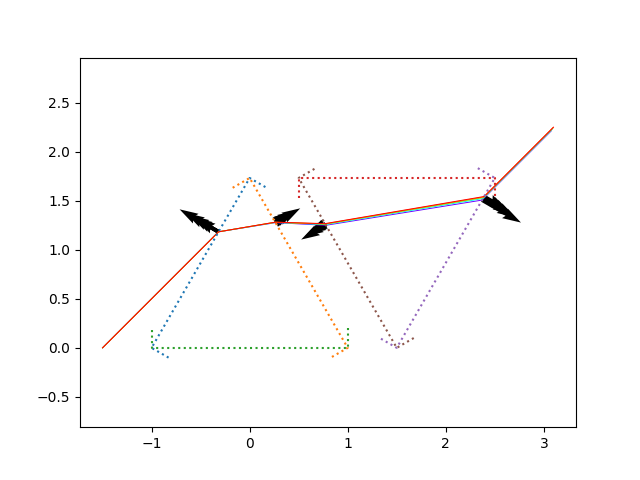

(-1.7299018246388964,
 3.3279383174168227,
 -0.21751211537659884,
 2.367754422908576)

In [48]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7}, m_quiver=True)
ax.axis("equal")

In [49]:
scene.momenta

array([[-0.00195842,  0.00113069],
       [-0.00163917,  0.00094638],
       [-0.00141077,  0.00081451],
       [-0.00123881,  0.00071523],
       [-0.00110445,  0.00063765],
       [ 0.00124731,  0.00072014],
       [ 0.00103711,  0.00059878],
       [ 0.00088894,  0.00051323],
       [ 0.00077839,  0.0004494 ],
       [ 0.00069253,  0.00039983],
       [ 0.00195842, -0.00113069],
       [ 0.00163917, -0.00094638],
       [ 0.00141077, -0.00081451],
       [ 0.00123881, -0.00071523],
       [ 0.00110445, -0.00063765],
       [-0.00124731, -0.00072014],
       [-0.00103711, -0.00059878],
       [-0.00088894, -0.00051323],
       [-0.00077839, -0.0004494 ],
       [-0.00069253, -0.00039983]])

In [50]:
prism1.momenta

array([[-0.00195842,  0.00113069],
       [-0.00163917,  0.00094638],
       [-0.00141077,  0.00081451],
       [-0.00123881,  0.00071523],
       [-0.00110445,  0.00063765],
       [ 0.00124731,  0.00072014],
       [ 0.00103711,  0.00059878],
       [ 0.00088894,  0.00051323],
       [ 0.00077839,  0.0004494 ],
       [ 0.00069253,  0.00039983]])

In [51]:
prism2.momenta

array([[ 0.00195842, -0.00113069],
       [ 0.00163917, -0.00094638],
       [ 0.00141077, -0.00081451],
       [ 0.00123881, -0.00071523],
       [ 0.00110445, -0.00063765],
       [-0.00124731, -0.00072014],
       [-0.00103711, -0.00059878],
       [-0.00088894, -0.00051323],
       [-0.00077839, -0.0004494 ],
       [-0.00069253, -0.00039983]])

In [52]:
prism1.momentum

array([-0.00270734,  0.00692584])

In [53]:
prism2.momentum

array([ 0.00270734, -0.00692584])

In [57]:
scene.momentum

array([ 3.03576608e-18, -6.50521303e-19])

In [56]:
scene.momentum - prism1.momentum - prism2.momentum

array([-4.33680869e-19,  8.67361738e-19])

# Angular momentum test

In [81]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([0,-1]), np.array([0,1])]
line.m_pos = [np.array([-1,0]), np.array([1,0])]
line.angular_momentum

2.0

In [82]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([0,-1]), np.array([0,1])]
line.m_pos = [np.array([-0.5,0]), np.array([0.5,0])]
line.angular_momentum

1.0

In [83]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([1,-1]), np.array([1,1])]
line.m_pos = [np.array([-1,0]), np.array([1,0])]
line.angular_momentum

2.0

In [93]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([1,1]), np.array([-1,-1])]
line.m_pos = [np.array([-1,1]), np.array([1,-1])]
line.angular_momentum

-4.0

<IPython.core.display.Javascript object>


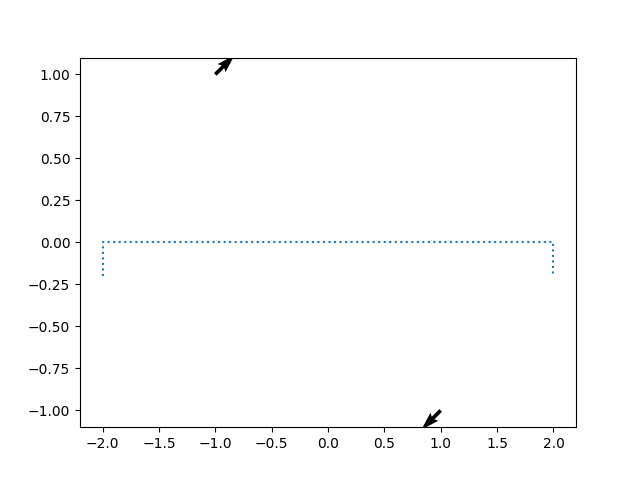

In [94]:
scene = two_d_tracer.Scene([], [line])
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True)

# Angular momentum for a sphere

In [123]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(1,2.6, 100)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

<IPython.core.display.Javascript object>


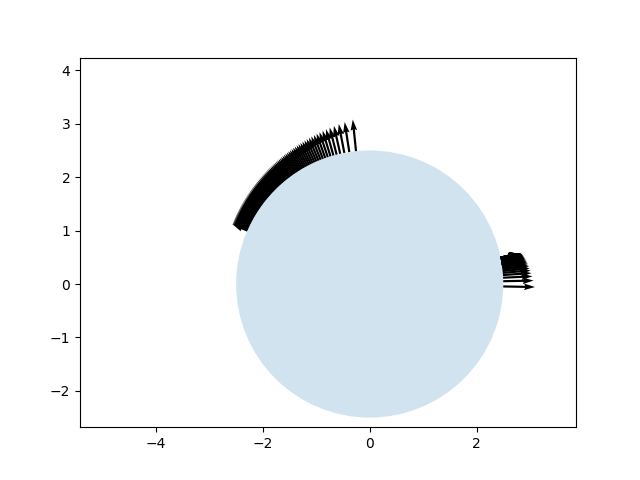

(-5.421980579819804,
 3.8615921762158907,
 -1.2239814140708973,
 2.7820943530509954)

In [125]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0}, m_quiver=True)
ax.axis("equal")

In [121]:
sphere.momentum

array([ 4.74363316, 11.60607551])

In [122]:
sphere.angular_momentum

-3.884776428629078e-15

In [139]:
# The momentum and normal are parallel, but not quite
[np.dot(sphere.m_pos[0],sphere.momenta[0])/np.linalg.norm(sphere.m_pos[0])/np.linalg.norm(sphere.momenta[0]) for i in range(len(sphere.momenta))]

[1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000

# Angular momentum for a mirror

In [144]:
mirror = two_d_tracer.SurfaceReflective([0,0], [-1, 0])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y], [1,0.5]) for y in np.linspace(1,2.6, 25)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

<IPython.core.display.Javascript object>


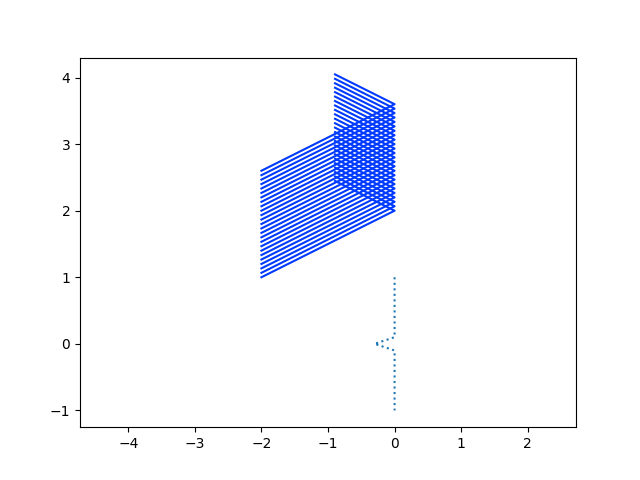

(-2.1, 0.1, -1.25236067977947, 4.2995742753688715)

In [145]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [146]:
mirror.angular_momentum

-0.2681366311348784